<h1 align="center">Lab 5.1 - Kohonen Nets </h1>

<h2 align="center">1. Kohonen Net with Random Translated Gaussian Blob Inputs </h2> 

In this lab you will use Kohonen's algorithm (also called a 'Kohonen net') to learn the mapping from a two-dimensional input array to an output array of neurons organized in a 2D topology.  The network is initialized with random receiptive fields for the ouput neurons. 

In [4]:
%matplotlib notebook
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})  # Useful for debugging
import matplotlib.pyplot as plt
from utils.lab5_utils import KohonenNetPlotter
import pdb

In [5]:
# *** NOTE *** Don't worry if you see this error: MatplotlibDeprecationWarning: axes.hold is deprecated.

# Initialization of the parameters:

# Number of Steps
numTrials = 12000

# input array
imsz=10;
im=np.zeros((imsz,imsz));
imx,imy=np.mgrid[:imsz,:imsz]; # image coordinates

# output array
SZ=10;
X,Y=np.mgrid[:SZ,:SZ];

# Visualize X and Y, you will use these in problem #1
print (X)  # row idx for each entry
print (Y)  # col idx for each entry

[[0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5 5 5 5]
 [6 6 6 6 6 6 6 6 6 6]
 [7 7 7 7 7 7 7 7 7 7]
 [8 8 8 8 8 8 8 8 8 8]
 [9 9 9 9 9 9 9 9 9 9]]
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


The input stimuli consist of images of Gaussian blobs at random locations of the image.

In [65]:
def imgen():
    # image generation function for problem 1, please do not modify
    x=imsz*np.random.rand()
    y=imsz*np.random.rand()
    im=np.exp(-0.5*((x-imx)**2+(y-imy)**2));
    return im

The following is a visualization of one such stimulus.

<IPython.core.display.Javascript object>


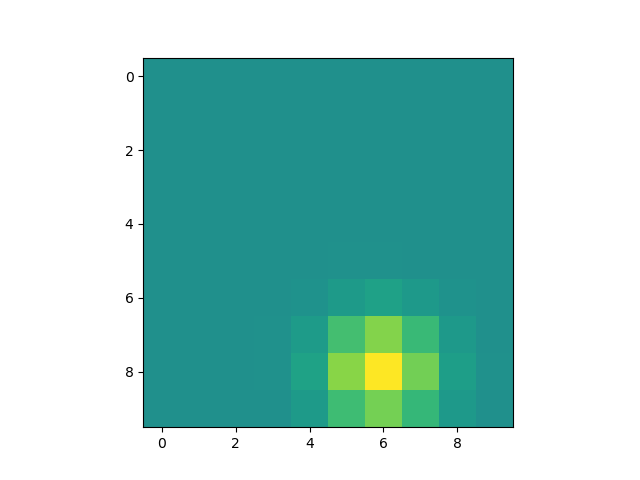

In [66]:
plt.figure()
axes = plt.imshow(imgen(), vmin=-1,vmax=1)

<h2 align="center">1.1 Kohonen Net Implementation </h2> 

Since the Kohonen's algorithm is a highly non-convex optimization, we should use a simulated annealing method to allow it converge to a good solution. The basic idea is that the learning rate and radius for spatial spreading activation within the map should decrease over time. So at the beginning, use a large number for these parameters to quickly get the network in the right ballpark, and then over time decrease these parameters so that learning is based on a longer temporal history, and the  spread of activation is more local.  You will need to experiment with different strategies.  The functions get_eta and get_sigma allow you to define a schedule for adjusting the learning rate (eta) and radius of propagation (sigma).  The default numbers are good starting conditions, eta should reach 1/10 its value by the end of training and sigma about 1/3 its value by the end of training.

In [69]:
def get_eta(t):
    # learning rate
    eta = 0.1 # default learning rate
    eta = eta*np.exp(-2*t/numTrials)
    
    return eta

def get_sigma(t):
    # width of Gaussian for spreading excitation
    sigma = 3.5 # default width
    sigma = sigma*np.exp(-t/numTrials)
    
    return sigma

def KohonenNetLearning(imgenerator):

    # weights initialization
    W=np.random.rand(imsz**2,SZ**2);
    W=np.dot(W,np.diag(1./np.sqrt(np.sum(W**2,0))));
    
    #Initialize Plotter
    plotter = KohonenNetPlotter(imx,imy,W,0)
    for t in range(numTrials):
        # paint Gaussian blob at a random position in image
        im = imgenerator()
        flat_im = im.reshape(imsz*imsz,1)

        # compute output and find winner and use X.take() and Y.take() after
        ## YOUR CODE Here
        output = W.T @ flat_im
        winner = np.argmax(output)
        winner_pos = [X.take(winner), Y.take(winner)]

        # spread activation to neighbors of winner, using get_sigma() as well
        # as your results from X.take() and Y.take() with X and Y
        ## YOUR CODE Here
        Lambda = []
        for i in range(SZ**2):
            pos_i = [X.take(i), Y.take(i)]
            Lambda.append(np.exp(-((winner_pos[0] - pos_i[0])**2 + (winner_pos[1] - pos_i[1])**2)/(2*get_sigma(t)**2)))
    
        # Hebbian weight update, use get_eta()
        for i in range(100):
            W[:,i] += get_eta(t)*Lambda[i]*(flat_im[:,0] - W[:,i])

        # normalize weight vectors
        W=np.dot(W,np.diag(1./np.sqrt(np.sum(W**2,0)))); 

        # display network state every 100 trials
        if t%100==0:
            plotter.updatePlot(W,t)

    print(get_sigma(t), get_eta(t))

<IPython.core.display.Javascript object>


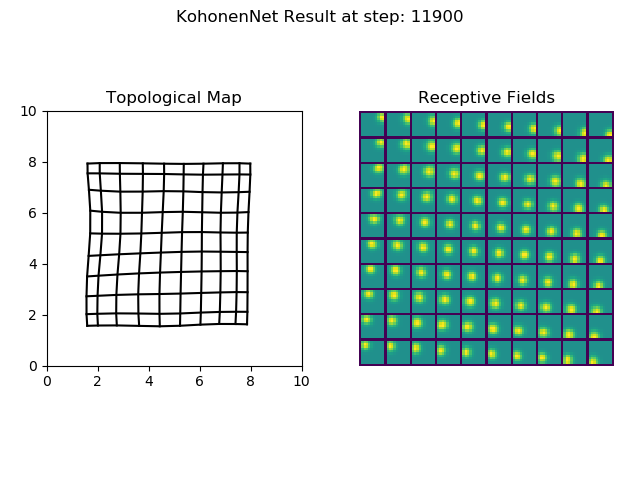

C:\Users\nickc\AnacondaProjects\lab5-som_manifolds\lab5-som_manifolds\utils\lab5_utils.py:102: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  self._mapAxes.hold(True)
C:\Users\nickc\AnacondaProjects\lab5-som_manifolds\lab5-som_manifolds\utils\lab5_utils.py:104: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  self._mapAxes.hold(False)


1.28768534674 0.0135357840997


In [70]:
KohonenNetLearning(imgen)

<h2 align="center">1.2 Kohonen Net with Lesion </h2> 

Now create a lesion in the input array, so that a specific region is devoid (set to zero) of stimulation. How do the topological map and the receptive fields change? Please explain the result.

In [61]:
def imgen_lesion():
    # image generation function for problem 2
    # The input signal generation function to simulate a lesion
    x=imsz*np.random.rand()
    y=imsz*np.random.rand()
    im=np.exp(-0.5*((x-imx)**2+(y-imy)**2))

    im[3:5,3:5] = 0 #lesion
    
    return im

<IPython.core.display.Javascript object>


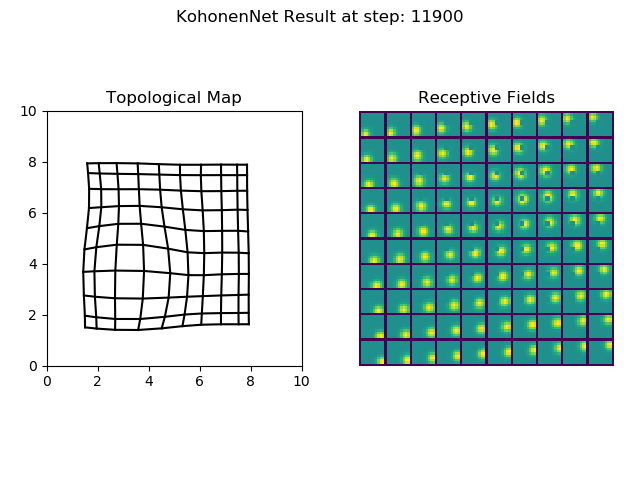

C:\Users\nickc\AnacondaProjects\lab5-som_manifolds\lab5-som_manifolds\utils\lab5_utils.py:102: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  self._mapAxes.hold(True)
C:\Users\nickc\AnacondaProjects\lab5-som_manifolds\lab5-som_manifolds\utils\lab5_utils.py:104: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  self._mapAxes.hold(False)


In [62]:
KohonenNetLearning(imgen_lesion)

<h2 align="center">1.3 Kohonen Net with Non-uniform Inputs </h2> 

Increase the density of stimuli within one area of the array. How does the topological map  and the receptive fields change? Please explain the result.

In [72]:
def imgen_local_density_increased():
    prob_special = 0.1  # Play with different values (0.01, 0.03, 0.1, ...)
    if np.random.rand() < prob_special:
        x,y = 3,3
    else:
        x=imsz*np.random.rand()
        y=imsz*np.random.rand()
    
    im = np.exp(-0.5*((x-imx)**2+(y-imy)**2))
    return im

<IPython.core.display.Javascript object>


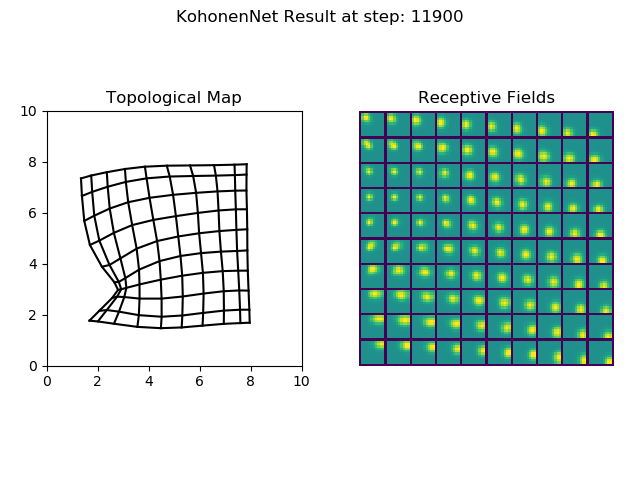

C:\Users\nickc\AnacondaProjects\lab5-som_manifolds\lab5-som_manifolds\utils\lab5_utils.py:102: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  self._mapAxes.hold(True)
C:\Users\nickc\AnacondaProjects\lab5-som_manifolds\lab5-som_manifolds\utils\lab5_utils.py:104: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  self._mapAxes.hold(False)


1.28768534674 0.0135357840997


In [73]:
KohonenNetLearning(imgen_local_density_increased)